In [220]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')


In [221]:
df = pd.read_csv('..\Datasets\international-airline-passengers.csv',parse_dates = ['Month'],index_col='Month')

In [222]:
df.head()

,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
Month,
1949-01,112.0
1949-02,118.0
1949-03,132.0
1949-04,129.0
1949-05,121.0


In [223]:
df.rename(columns = {'International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60':'Monthly_Totals'},inplace = True)

In [224]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 145 entries, 1949-01 to International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Monthly_Totals  144 non-null    float64
dtypes: float64(1)
memory usage: 2.3+ KB


In [225]:
df.isna().sum()

Monthly_Totals    1
dtype: int64

In [226]:
df = df.dropna()

In [227]:
df

,Monthly_Totals
Month,
1949-01,112.0
1949-02,118.0
1949-03,132.0
1949-04,129.0
1949-05,121.0
...,...
1960-08,606.0
1960-09,508.0
1960-10,461.0


<AxesSubplot:xlabel='Month'>

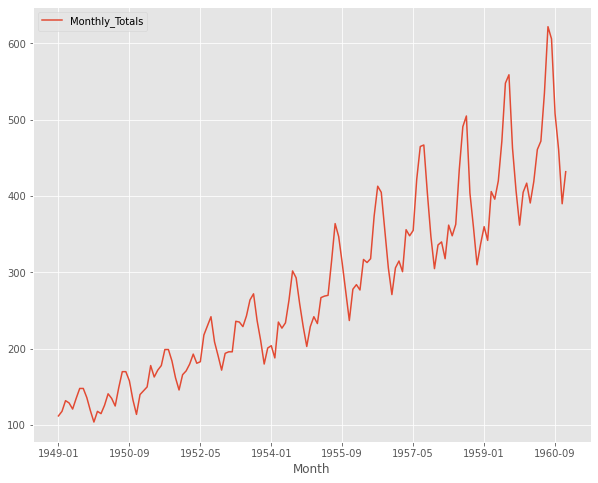

In [228]:
df.plot()
# plt.plot(df.Monthly_Totals)

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

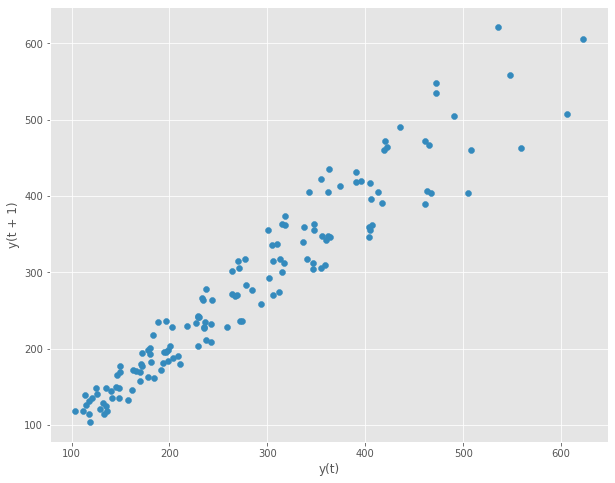

In [229]:
pd.plotting.lag_plot(df['Monthly_Totals'])

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

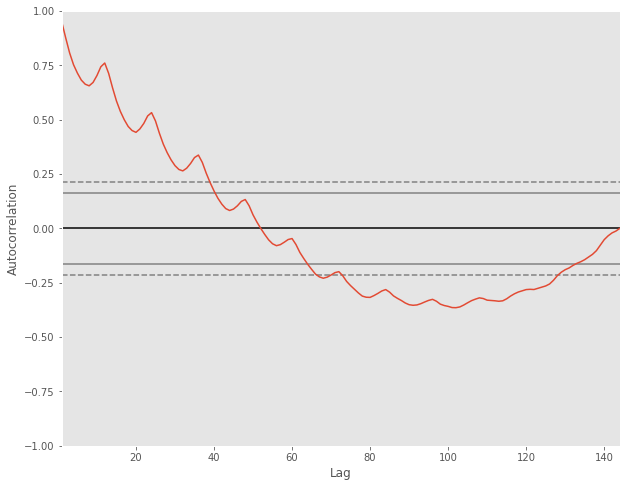

In [230]:
pd.plotting.autocorrelation_plot(df['Monthly_Totals'])

In [231]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [232]:
# df.sort_index(inplace=True)

In [233]:
# fig = plt.figure(figsize = (15,10))
decompose = seasonal_decompose(df.Monthly_Totals,model = 'additive',period=int(len(df)/2))
plt.rcParams['figure.figsize']=(10,7)


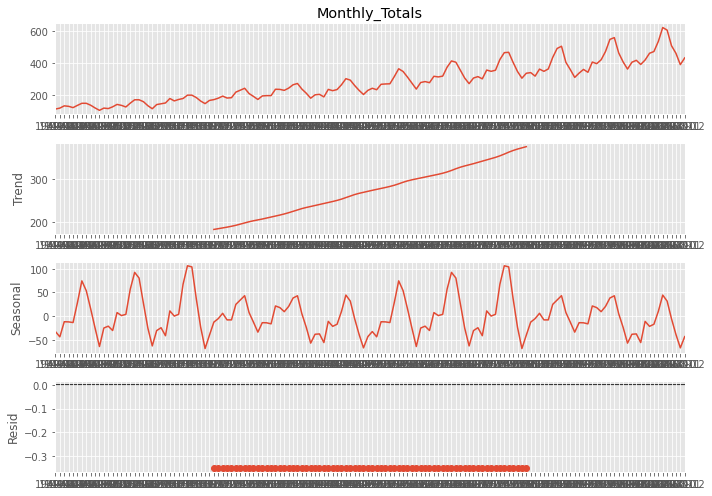

In [234]:
decompose.plot()
plt.show()

In [235]:
df['month_diff'] = df['Monthly_Totals'].diff()
# df['month_diff'] = df['month_diff'].diff()
# plt.plot(df['Monthly_Totals'])

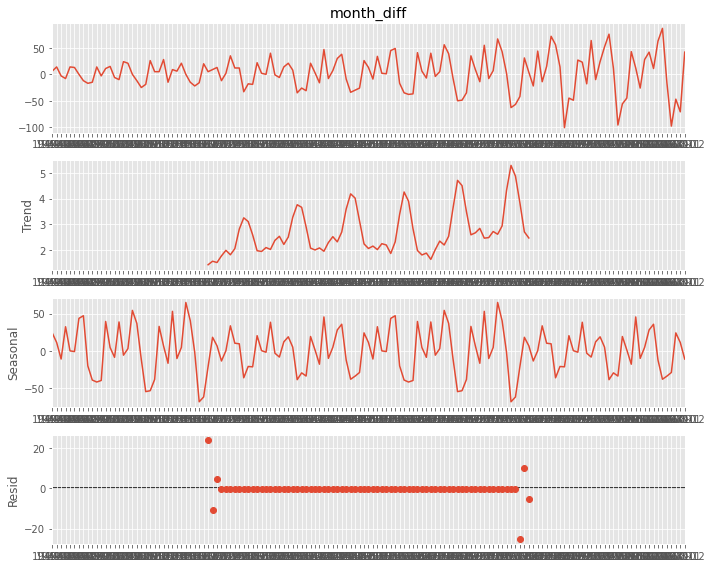

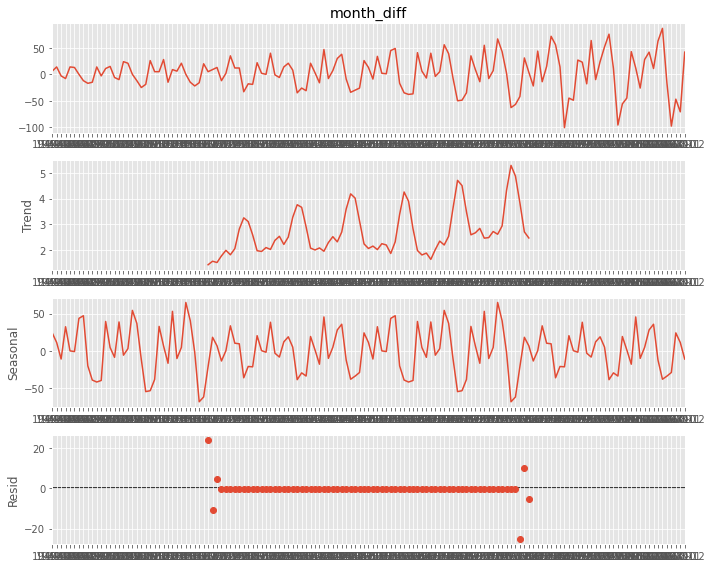

In [236]:
X = df['month_diff'].dropna()
fig = plt.rcParams['figure.figsize'] = (10,8)
dcomp = seasonal_decompose(X,model = 'additive',period = int(len(df)/2)-2)
dcomp.plot()
# plt.plot()

In [237]:
# df.plot()

<AxesSubplot:xlabel='Month'>

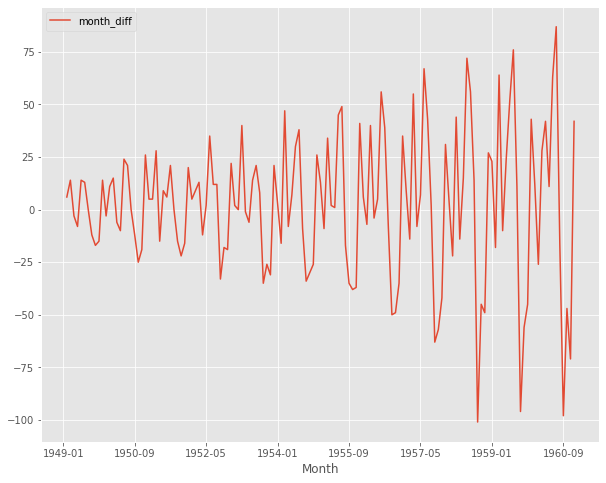

In [238]:
df.plot(y = 'month_diff')

In [239]:
#AR Model
from statsmodels.tsa.ar_model import AR

In [240]:
model = AR(X)

C:\Users\Win\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\ar_model.py:791: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRECATI

In [241]:
model_fitted = model.fit()

In [242]:
print('The lag value chose is: %s' % model_fitted.k_ar)

print('The coefficients of the model are:\n %s' % model_fitted.params)

The lag value chose is: 13
The coefficients of the model are:
 const             5.821280
L1.month_diff    -0.431277
L2.month_diff    -0.237514
L3.month_diff    -0.133261
L4.month_diff    -0.228982
L5.month_diff    -0.112024
L6.month_diff    -0.224406
L7.month_diff    -0.145896
L8.month_diff    -0.299429
L9.month_diff    -0.102965
L10.month_diff   -0.255440
L11.month_diff   -0.089172
L12.month_diff    0.779033
L13.month_diff    0.401068
dtype: float64


In [243]:
# df.sort_index(inplace=True)

In [244]:
pred=model_fitted.predict()

In [247]:
plt.plot(df['month_diff'],label="Actual")

plt.plot(pred,label = 'predicted')
plt.legend()

TypeError: tzinfo argument must be None or of a tzinfo subclass, not type 'UnitData'

<Figure size 720x576 with 1 Axes>

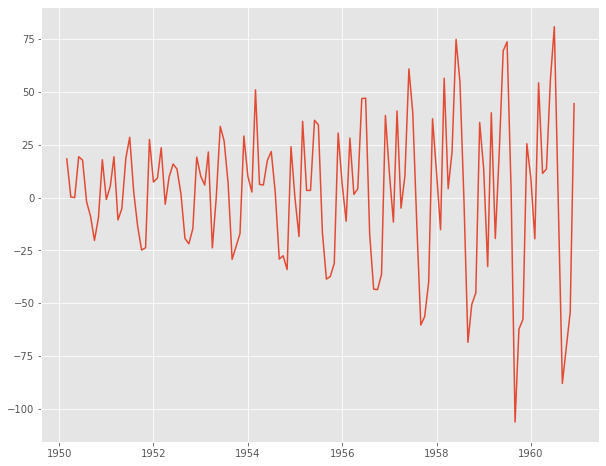

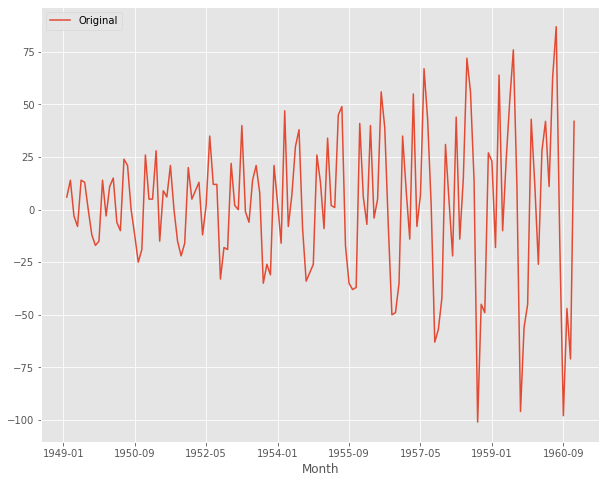

In [250]:
plt.plot(pred,label="Predicted")
df.plot(y = 'month_diff',label = "Original")
plt.legend()